# XGBoost Model
This is by far the most accurate modelling technique for structed data. We will use a datapipeline for this as well. This improves future flexibility of the model.

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sys
sys.path.append('../')
from dataflow import Flow

In [2]:
version = '6.0.3'

In [3]:
my_flow = Flow(None, None, None, csv_path=f'../data_files/{version}.csv')
all_data = my_flow.get_combined_data()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = my_flow.get_train_val_test_split()

## Define the Model
Now we have our data (the same as was used by the neural network) we try to see how well we can get this to perform. We will be using an XGBClassifier. This is by far the best method to use for this binary classification problem. 

In [5]:
feature_cols = [f for f in all_data.columns.to_list() if f != 'category']
data_dmatrix = xgb.DMatrix(data=all_data[feature_cols], label=all_data.category)

In [4]:
# Parameters for the model
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'eval_metric': ['auc', 'logloss'],
    'use_label_encoder': False,
}

# Instantiate the classifier
xgb_clf = xgb.XGBClassifier(**params)

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, eval_metric='auc')

[0]	validation_0-auc:0.95448
[1]	validation_0-auc:0.95850
[2]	validation_0-auc:0.96249
[3]	validation_0-auc:0.96360
[4]	validation_0-auc:0.96604
[5]	validation_0-auc:0.96750
[6]	validation_0-auc:0.96874
[7]	validation_0-auc:0.96921
[8]	validation_0-auc:0.96987
[9]	validation_0-auc:0.97050
[10]	validation_0-auc:0.97166
[11]	validation_0-auc:0.97209
[12]	validation_0-auc:0.97247
[13]	validation_0-auc:0.97289
[14]	validation_0-auc:0.97320
[15]	validation_0-auc:0.97352
[16]	validation_0-auc:0.97388
[17]	validation_0-auc:0.97445
[18]	validation_0-auc:0.97490
[19]	validation_0-auc:0.97516
[20]	validation_0-auc:0.97538
[21]	validation_0-auc:0.97574
[22]	validation_0-auc:0.97603
[23]	validation_0-auc:0.97624
[24]	validation_0-auc:0.97639
[25]	validation_0-auc:0.97653
[26]	validation_0-auc:0.97667
[27]	validation_0-auc:0.97687
[28]	validation_0-auc:0.97716
[29]	validation_0-auc:0.97732
[30]	validation_0-auc:0.97751
[31]	validation_0-auc:0.97768
[32]	validation_0-auc:0.97789
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['auc', 'logloss'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=32, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [6]:
# Check the accuracy score
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = xgb_clf.predict(X_test)
acc, roc_auc = accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)
print(f'Primitive Model Accuracy: {acc:.4f}\nPrimitive Model ROC-AUC: {roc_auc:.4f}')

Primitive Model Accuracy: 0.9423
Primitive Model ROC-AUC: 0.9423


/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Feature Importance Analysis

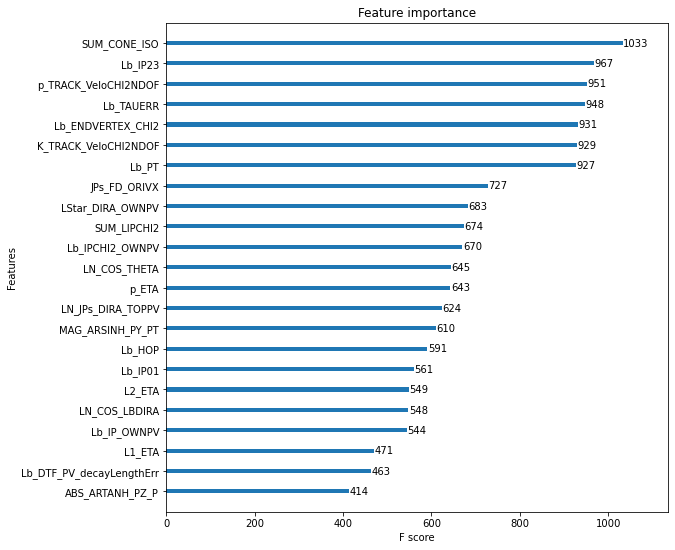

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
xgb.plot_importance(xgb_clf, ax=ax, grid=False)
#plt.savefig(f'../images/MLModels/feature_importance_xgb_v{version}.png')
plt.show()

In [7]:
import plotter as ptr

train = X_train.copy()
train['category'] = y_train

val = X_val.copy()
val['category'] = y_val

test = X_test.copy()
test['category'] = y_test

myPlotter = ptr.ProbabilityDistribution('SK', train, val, test)

/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


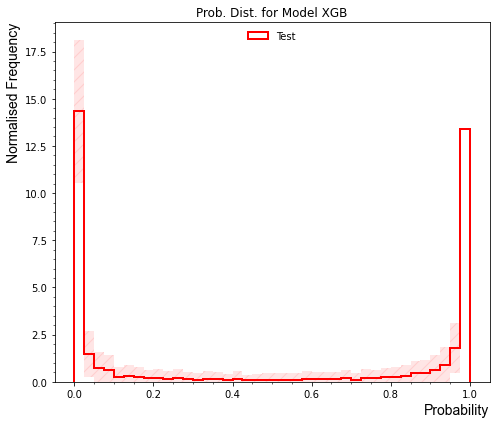

/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


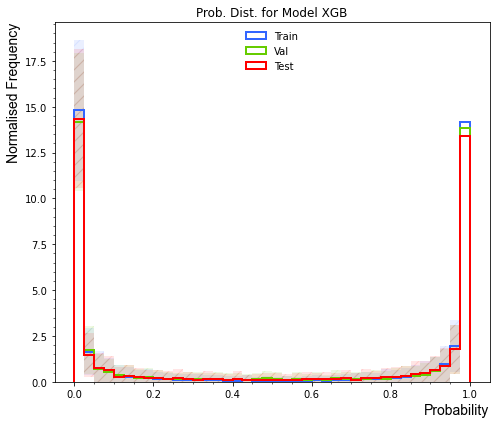

In [11]:
myPlotter.plot_singular(xgb_clf, 'XGB', 'test', split_bg_sig=False)
myPlotter.plot_multiple(xgb_clf, 'XGB')

## XGB Punzi FOM Scan

In [11]:
def calculate_punzi(model, labelled_data, prob_range=[0.3, 0.9], dpoints=150, significance=5, mass_range=[5200, 5800]):
    import numpy as np
    import pandas as pd
    
    probability_space = np.linspace(prob_range[0], prob_range[1], dpoints)
    # A region over which the Punzi FOM will be calculated
    
    labels = labelled_data['category'].to_numpy()
    nsignal_before = labelled_data['category'].value_counts()[1]
    # How many signal events are in the original data sample
    
    feature_cols = labelled_data.columns.to_list()
    feature_cols.remove('category')
    # Get all the columns with features and not the category
    predictions = model.predict_proba(labelled_data[feature_cols])[:,1]
    # Make predictions on the labelled data using the trained MVA model
    
    punzis = []
    for p in probability_space:
        # Iterate through each point in probability space
        
        # Each event is predicted a probability P. If P < p we say that,
        # it is background, else it is signal. I.e. p -> 1 in limit of high
        # background rejection, high purity sample 
        
        preds = np.squeeze(np.where(predictions < p, 0, 1))
        all = np.array([preds, labels]).T

        efficiency = len(np.squeeze(np.where((all == [1, 1]).all(axis=1)))) / nsignal_before
        # Truth matched signal i.e. model said it was signal and it actually was 
        background = len(list(np.where((all == [1, 0]).all(axis=1))[0]))
        # background you thought was signal, so did not reject i.e. it got through 
        
        #print(f'{p:.4f} {efficiency:.5f} {background}')
        # Background is how much background is left after the cut i.e. how much REAL background is left (incorrectly identified as signal)
        
        punzi = efficiency / (significance/2 + np.sqrt(background))
        # Calculate the Punzi as defined by LHCb 
        
        punzis.append(punzi)
        # Add this point to the array of Punzis
    return np.array(punzis), probability_space

In [12]:
test_df = X_test
test_df['category'] = y_test

val_df = X_val
val_df['category'] = y_val

train_df = X_train
train_df['category'] = y_train

/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


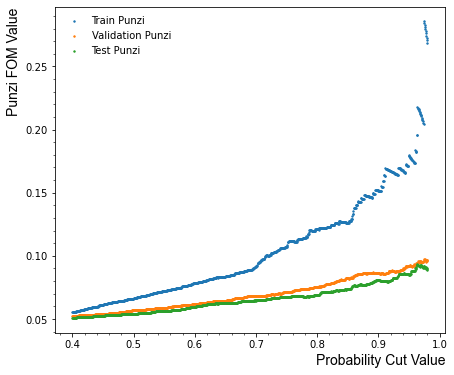

In [13]:
p1, probs1 = calculate_punzi(xgb_clf, train_df, prob_range=[0.4, 0.98], dpoints=1000)
p2, probs2 = calculate_punzi(xgb_clf, val_df, prob_range=[0.4, 0.98], dpoints=1000)
p3, probs3 = calculate_punzi(xgb_clf, test_df, prob_range=[0.4, 0.98], dpoints=1000)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
fig.patch.set_facecolor('#FFFFFF')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

fonts = {'fontname':'Arial'}

ax.scatter(probs1, p1, s=2, label='Train Punzi')
ax.scatter(probs2, p2, s=2, label='Validation Punzi')
ax.scatter(probs3, p3, s=2, label='Test Punzi')

plt.ylabel('Punzi FOM Value', horizontalalignment='right', y=1.0, fontsize=14, **fonts)
plt.xlabel('Probability Cut Value', horizontalalignment='right', x=1.0, fontsize=14, **fonts)
plt.legend(loc='upper left', ncol=1, fancybox=False, shadow=True, frameon=False)
plt.savefig(f'../images/MLModels/punzis/XGB_{version}.png')
plt.show()